In [25]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
import seaborn as sns
import cartopy.feature as cfeature
import metpy.calc as mpcalc
from metpy.calc import dewpoint_from_relative_humidity
from metpy.cbook import get_test_data
from metpy.plots import Hodograph, SkewT
from metpy.units import units

In [26]:
rap = xr.open_mfdataset("/glade/scratch/cbecker/ptype_output_w_soundings/rap/20221217/0000/*.nc", concat_dim='time', combine='nested')

In [27]:
# create dewpoint from relative humidity since RAP doesn't natively carry dewpoint
rap['dpt'] = dewpoint_from_relative_humidity(rap['t'] * units.degC,
                                             rap['r'].values / 100)

In [28]:
rap

<xarray.Dataset>
Dimensions:            (time: 18, isobaricInhPa: 37, y: 337, x: 451)
Coordinates:
  * time               (time) datetime64[ns] 2022-12-17 ... 2022-12-17
    step               (time) timedelta64[ns] 01:00:00 02:00:00 ... 18:00:00
  * isobaricInhPa      (isobaricInhPa) float64 1e+03 975.0 950.0 ... 125.0 100.0
    latitude           (y, x) float64 dask.array<chunksize=(337, 451), meta=np.ndarray>
    longitude          (y, x) float64 dask.array<chunksize=(337, 451), meta=np.ndarray>
    valid_time         (time) datetime64[ns] 2022-12-17T01:00:00 ... 2022-12-...
    surface            float64 0.0
    heightAboveGround  float64 2.0
Dimensions without coordinates: y, x
Data variables: (12/24)
    t                  (time, isobaricInhPa, y, x) float32 dask.array<chunksize=(1, 37, 337, 451), meta=np.ndarray>
    u                  (time, isobaricInhPa, y, x) float32 dask.array<chunksize=(1, 37, 337, 451), meta=np.ndarray>
    v                  (time, isobaricInhPa, y, x) float32 dask.array<chunksize=(1, 37, 337, 451), meta=np.ndarray>
    r                  (time, isobaricInhPa, y, x) float32 dask.array<chunksize=(1, 37, 337, 451), meta=np.ndarray>
    gh                 (time, isobaricInhPa, y, x) float32 dask.array<chunksize=(1, 37, 337, 451), meta=np.ndarray>
    orog               (time, y, x) float32 dask.array<chunksize=(1, 337, 451), meta=np.ndarray>
    ...                 ...
    ML_snow            (time, y, x) float64 dask.array<chunksize=(1, 337, 451), meta=np.ndarray>
    ML_csnow           (time, y, x) int64 dask.array<chunksize=(1, 337, 451), meta=np.ndarray>
    ML_icep            (time, y, x) float64 dask.array<chunksize=(1, 337, 451), meta=np.ndarray>
    ML_cicep           (time, y, x) int64 dask.array<chunksize=(1, 337, 451), meta=np.ndarray>
    ML_fzrn            (time, y, x) float64 dask.array<chunksize=(1, 337, 451), meta=np.ndarray>
    ML_cfzrn           (time, y, x) int64 dask.array<chunksize=(1, 337, 451), meta=np.ndarray>
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    history:                 2023-05-15T22:00 GRIB to CDM+CF via cfgrib-0.9.1...

In [29]:
# select specific grid cell to plot skew-T
x, y = 2, 111 


# select time step
time_step = 8


# pull out pressure levels for y-axis of skew-T
pressure_levels = rap['isobaricInhPa'].values

temperature_profile = rap['t'].isel(x=x, y=y, time=time_step).values
dewpoint_profile = rap['dpt'].isel(x=x, y=y, time=time_step).values

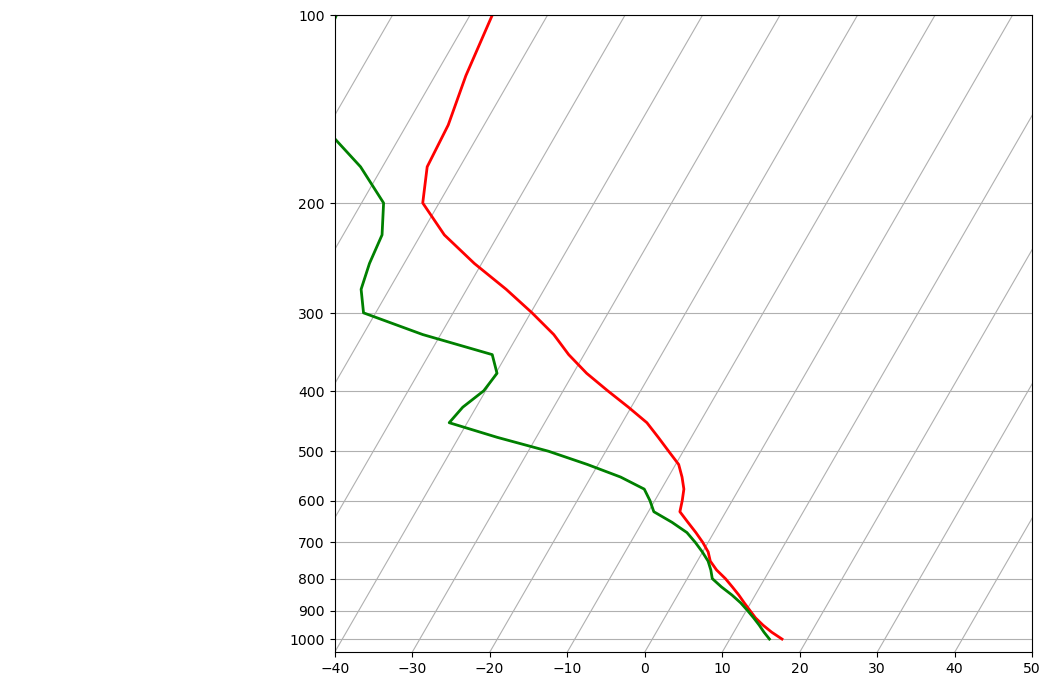

In [30]:
fig = plt.figure(figsize=(9, 9))
skew = SkewT(fig)

# Plot the data using normal plotting functions, in this case using
# log scaling in Y, as dictated by the typical meteorological plot
skew.plot(pressure_levels, temperature_profile, 'r', linewidth=2)
skew.plot(pressure_levels, dewpoint_profile, 'g', linewidth=2)